In [1]:
# Step-1: import libraries 


import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
# file path
for dirname,_,filenames in os.walk('/kaggle/input'):
    for file in filenames:
        print(os.path.join(dirname,file))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
# load Dataset
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Data Preprocessing
df=df[['v1','v2']]
df.columns=['label','text']
df['label']=df['label'].map({'ham':0,'spam':1})

In [6]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# split data into training and testing sets
x=df['text']
y=df['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
# TF-IDF Vectorization

vectorizer=TfidfVectorizer(stop_words='english',lowercase=True)

In [9]:
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [10]:
print(x_train.shape)
print(y_train.shape)


(4457, 7440)
(4457,)


In [11]:
# Naive Bayes Classifier

model=MultinomialNB()
model.fit(x_train,y_train)


MultinomialNB()

# Evaluation

In [16]:
# Prediction
y_pred=model.predict(x_test)
print(f'accuracy_score: {accuracy_score(y_test,y_pred)}')
target_names=['ham','spam']
print(f'Classification Report: \n{classification_report(y_test,y_pred,target_names=target_names)}')

accuracy_score: 0.968609865470852
Classification Report: 
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



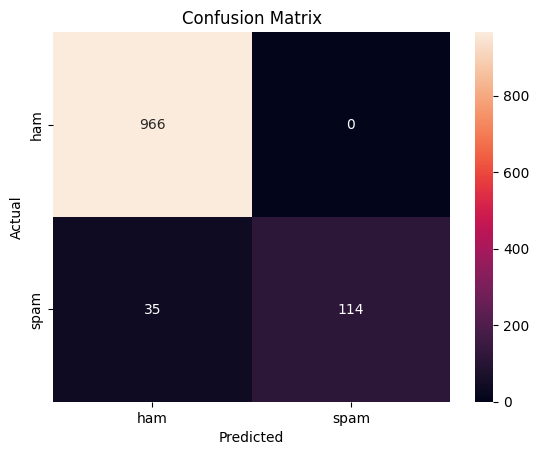

In [19]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=target_names,yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()